<a href="https://colab.research.google.com/github/youssefbourais0310/Machine_learning_Classification/blob/main/4_Evaluating_a_machine_learning_model_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
# Standard imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


In [75]:
#1.get the data ready  
heart_disease = pd.read_csv("/content/drive/MyDrive/heart-disease.csv")     
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
# Import the RandomForestClassifier estimator class
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target" , axis = 1)
y = heart_disease  ["target"] 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#instatiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data(training the machine learning model  )
clf.fit(X_train , y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
clf.score(X_test,y_test)

0.8524590163934426

In [78]:
#model is trained on 5 diffrent versions of training data,and evaluated on 5 diffrent versions of the test data
cross_val_score(clf , X , y , cv=5 )


array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [79]:
#model is trained on 10 diffrent versions of training data,and evaluated on 10 diffrent versions of the test data
cross_val_score(clf , X , y , cv=10 )

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [83]:
np.random.seed(42)

#clf_single_score=clf.score

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y,cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [85]:
# Defulte scoring parameter of classifier = ,ean accuracy 
clf.score(X_test, y_test)

0.8524590163934426

In [86]:
#scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

## QST : So Why do we use cross-validation score ?
## ANSWR : To avoid getting lucky scores.

# Classification model evaluation metrics



1.   Accuracy
2.   Area under ROC curve
3.   Confusion matrix
4.   Classification report



# 1 Accuracy

In [87]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2020)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [89]:
np.mean(cross_val_score)

0.8149726775956283

In [90]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")


Heart Disease Classifier Cross-Validated Accuracy: 81.50%


#  2 Area under the receiver operating characteristic curve (AUC/ROC)

*   Area under curve (AUC)
*   ROC curve
 
## ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

*   True positive = model predicts 1 when truth is 1
*   False positive = model predicts 1 when truth is 0
*   True negative = model predicts 0 when truth is 0
*   False negative = model predicts 1 when truth is 1

> Indented block















In [91]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.25, 0.75],
       [0.19, 0.81],
       [0.76, 0.24],
       [0.99, 0.01],
       [0.46, 0.54],
       [0.36, 0.64],
       [0.01, 0.99],
       [0.21, 0.79],
       [0.45, 0.55],
       [0.08, 0.92]])

In [93]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.75, 0.81, 0.24, 0.01, 0.54, 0.64, 0.99, 0.79, 0.55, 0.92])

In [94]:
# Caculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03703704, 0.03703704, 0.03703704, 0.03703704,
       0.07407407, 0.07407407, 0.07407407, 0.07407407, 0.11111111,
       0.11111111, 0.14814815, 0.18518519, 0.18518519, 0.22222222,
       0.22222222, 0.2962963 , 0.33333333, 0.33333333, 0.33333333,
       0.37037037, 0.37037037, 0.44444444, 0.51851852, 0.51851852,
       0.59259259, 0.7037037 , 0.74074074, 0.81481481, 0.88888889,
       0.96296296, 1.        ])

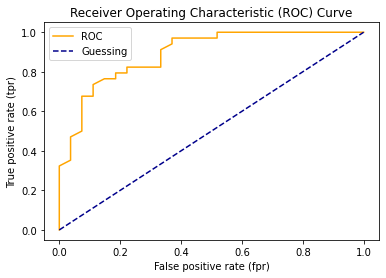

In [95]:
# Create a function for plotting ROC curves
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [96]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8921568627450981

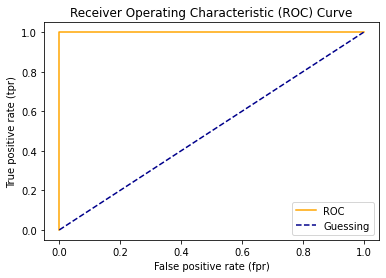

In [97]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [98]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

# 3 Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [99]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  6],
       [ 7, 27]])

In [100]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Label"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,21,6
1,7,27


In [101]:
# How to install a conda package into the current environment from a Jupyter Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

/bin/bash: conda: command not found


Collecting package metadata (current_repodata.json): ...working... done

==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda


Solving environment: ...working... done

# All requested packages already installed.

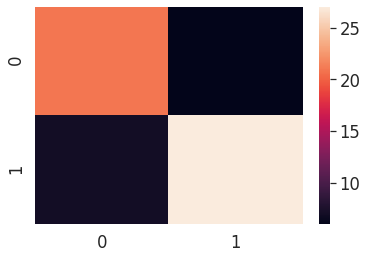

In [102]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

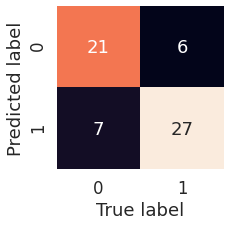

In [103]:
def plot_conf_mat(conf_mat):
    """
    Plot a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");

plot_conf_mat(conf_mat)

# 4 Classification Report

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [105]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


## To summarize classification metrics:

* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* **Precision** and **recall** become more important when classes are imbalanced.

* If false positive predictions are worse than false negatives, aim for higher precision.

* If false negative predictions are worse than false positives, aim for higher recall.

* **F1-score** is a combination of precision and recall.

In [106]:
32

32